<a href="https://colab.research.google.com/github/hoeen/codestates-projects/blob/main/Project_section1_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI_08_박우석

# Project - Section 1

Goal of project

앞서 알려드린 것 처럼.

**다음 분기에 어떤 게임을 설계해야 할까**
를 정하는 과정과 그 결과를 보여주는 것이 목표입니다.

데이터셋을 읽는 것 부터,

이러한 게임을 만들어야 한다는 결론까지 의 과정을 colab을 사용하여 작성하고,

해당 내용을 기반으로 설명하는 영상을 작성하는 것이

박우석님이 이번 프로젝트 기간 동안 하셔야 하는 일입니다.

당연히 어떠한 코드, 분석, 라이브러리 혹은 목표를 가지는지는 온전히 박우석님의 자유입니다.

그러나, Section 1 Project 인 만큼 해당 기간 동안 배운 내용을 위주로 설정하는 것이 권장됩니다.

아직 배우지 않은 Deep Learning을 사용하면 곤란하겠죠?

추가로, 박우석님의 발표를 듣는 사람은 비데이터 직군이라 가정합니다.

즉 박우석님의 생각이나 가정들을 설명하는 과정에서 최대한 배경지식이 없는 사람들도 이해할 수 있도록 노력하셔야 할 겁니다.

#### 발표에 반드시 포함되어야 하는 내용은 다음과 같습니다.

- 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.  
- 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.  
- 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.



In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv',
           index_col=0)
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


Data Description

- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

단위 조정
1. 기본단위를 M으로 본다.
2. K 가 있는 것들은 1000으로 나눠주고 뒤에 M을 붙인다.

0.3 = 0.3M

50k = 0.05 = 50,000

(K * 1,000   
 M(기본단위) * 1,000,000)



## data 정리. 결측치 조사

In [3]:
# 결측치
data.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
data.loc[data.Year.isnull(),:]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
359,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
431,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16241,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16276,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16279,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [5]:
data.loc[data.Genre.isnull(),:]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
409,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1329,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
1583,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1972,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79
2044,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0,0.03
2498,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0,0
3354,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0,0.03
3364,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0,0,0
3471,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0,0


In [6]:
data.loc[data.Publisher.isnull(),:]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1314,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1561,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1790,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1880,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0
1962,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0,0.01
2071,World of Tanks,X360,NaN,Shooter,NaN,0,0.03,0,0
2971,Chou Soujuu Mecha MG,DS,NaN,Simulation,NaN,0,0,0.06,0
3185,Action Man-Operation Extreme,PS,NaN,Action,NaN,0.05,0.03,0,0.01
3413,Dance with Devils,PSV,2016.0,Action,NaN,0,0,0.01,0


그럼 Year, Genre, Publisher 의 값들은 뭐가 있는지 살펴보자

Year 의 경우 20xx / xx 등으로 값이 나누어져 있다. 20xx로 통일시키자

In [7]:
data.Year.value_counts()

2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
          ... 
14.0         2
13.0         2
94.0         1
2020.0       1
86.0         1
Name: Year, Length: 62, dtype: int64

In [8]:
data.Genre.value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

In [9]:
data.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Saurus                             1
CCP                                1
Wargaming.net                      1
Pony Canyon                        1
CokeM Interactive                  1
Name: Publisher, Length: 578, dtype: int64

결측치 비율 그래프 - 이를 보고 버릴것인지 채울것인지를 정한다.   
missingno 패키지를 활용해서 null data 를 더 쉽게 볼 수 있다


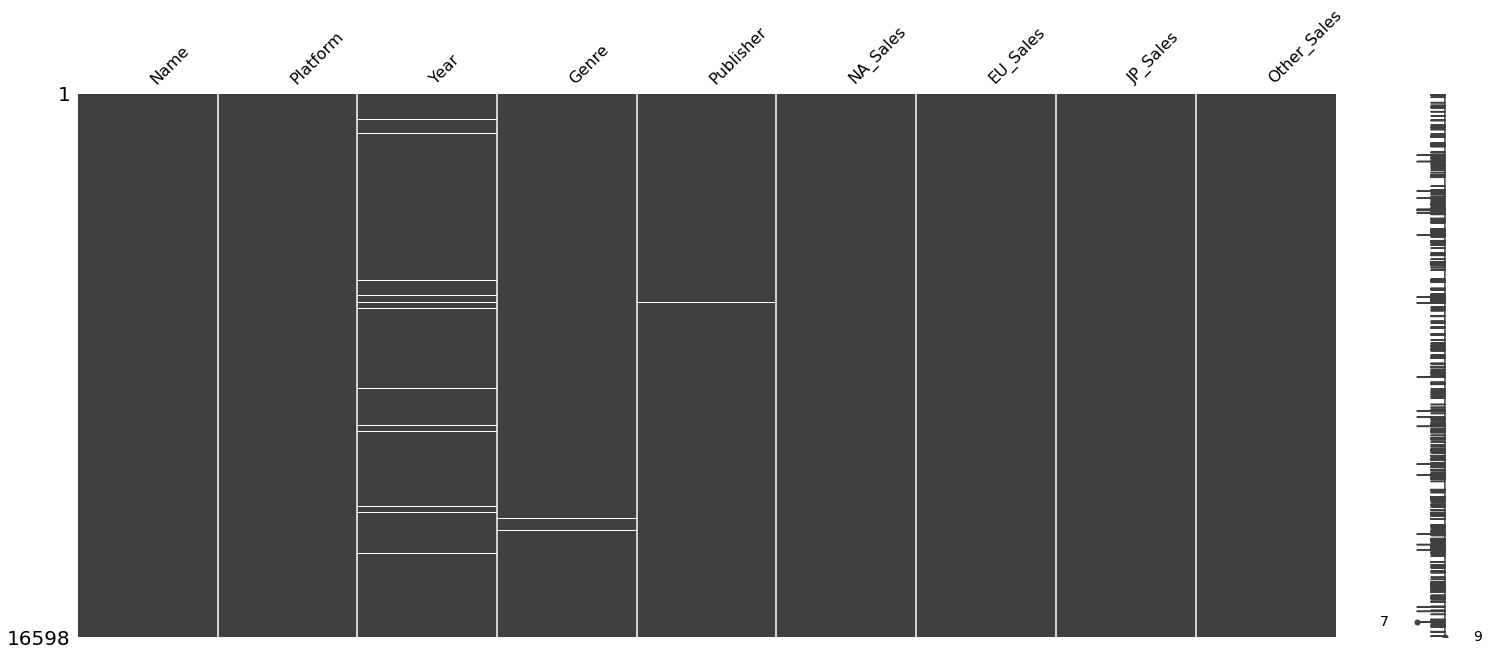

In [10]:
msno.matrix(data)

결측치의 비율이 매우 낮아 보인다. 수치로는?

In [11]:
for column in data.columns:
    ratio = len(data.loc[data[column].isnull()])/len(data[column])
    print(f'{column} : {ratio*100:.4f}% of null data')

Name : 0.0000% of null data
Platform : 0.0000% of null data
Year : 1.6327% of null data
Genre : 0.3012% of null data
Publisher : 0.3494% of null data
NA_Sales : 0.0000% of null data
EU_Sales : 0.0000% of null data
JP_Sales : 0.0000% of null data
Other_Sales : 0.0000% of null data


year, Genre, Publisher 의 null 비율은 각각 1.6%, 0.3%, 0.35% 로 매우 낮음을 알수 있다. 그래서 해당 데이터는 그냥 제거를 할것이다. 

In [12]:
# 결측치 제거
data1 = data.dropna()
data1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### Sales 단위 조정
1. 기본단위를 M으로 본다.
2. K 가 있는 것들은 1000으로 나눠주고 뒤에 M을 붙인다.

In [13]:
data1[data1.NA_Sales.str.contains('M')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
448,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1
459,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27
578,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55M,1.94,2.23,0.15
626,The Hobbit,GBA,2003.0,Platform,Vivendi Games,0.14M,0.05,0,0
673,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008.0,Action,LucasArts,1.23M,0.3,0,0.14
...,...,...,...,...,...,...,...,...,...
15987,Juiced 2: Hot Import Nights,PC,2007.0,Racing,THQ,0M,0.01,0,0
16153,Taiko no Tatsujin Wii,Wii,2008.0,Misc,Namco Bandai Games,0M,0,0.67,0
16170,Medal of Honor: Airborne,X360,2007.0,Shooter,Electronic Arts,0.45M,0.53,0.01,0.12
16409,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,0.53M,0.02,0,0.09


In [14]:
# Sales의 M, K 값들을 모두 통일시켜 숫자로 반환
def sales_convert(price):
    if price[-1] == 'M':
        return float(price[:-1])
    elif price[-1] == 'K':
        return float(price[:-1])/1000
    else:
        return float(price)

data2 = data1.copy()
data2.loc[:,'NA_Sales'] = data2.loc[:,'NA_Sales'].apply(sales_convert)
data2.loc[:,'EU_Sales'] = data2.loc[:,'EU_Sales'].apply(sales_convert)
data2.loc[:,'JP_Sales'] = data2.loc[:,'JP_Sales'].apply(sales_convert)
data2.loc[:,'Other_Sales'] = data2.loc[:,'Other_Sales'].apply(sales_convert)

data2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [15]:
data2.loc[[11,46,146,879],:]  #Sales 변환 여부 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11,Ford Racing,PS,2001.0,Racing,Empire Interactive,0.48,0.33,0.00,0.06
46,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,0.06,0.08,0.16,0.03
146,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0.00,0.02,0.00,0.00
879,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0.00,0.00,0.04,0.00


# Q1) 지역에 따라서 선호하는 게임 장르가 다른가?

먼저 Genre별로 지역별 Sales 총합을 계산한다.

In [16]:
data2.groupby('Genre').sum()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,,
Action,6477917.0,858.75,513.64,156.60,183.99
Adventure,2538404.0,101.79,63.66,51.87,16.70
Fighting,1662060.0,220.35,99.90,87.14,36.15
Misc,3354273.0,394.73,208.15,104.18,72.64
Platform,1733521.0,445.38,200.63,130.53,51.45
Puzzle,1118959.0,121.58,50.47,56.24,12.44
Racing,2424102.0,354.70,235.02,56.32,76.51
Role-Playing,2924339.0,318.76,183.09,342.93,56.73
Shooter,2543679.0,574.48,310.23,38.18,101.86


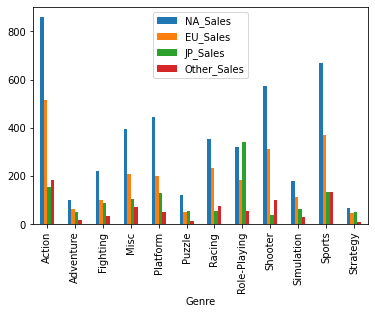

In [17]:
data2.groupby('Genre').sum().plot.bar(y=['NA_Sales','EU_Sales',
                                        'JP_Sales','Other_Sales'])

절대량으로 보았을 때는 NA 쪽의 판매량이 높고, EU, JP, Other 순으로 판매량이 높다.  
하지만 지역 내에서의 Genre별 선호도를 잘 보기 위해서는 각 지역별 총합으로 나누어주면 ratio를 볼 수 있다.

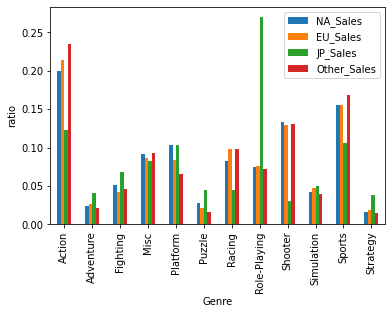

In [18]:
# ratio plot
data_gen = data2.groupby('Genre').sum().loc[:,['NA_Sales','EU_Sales',
                                              'JP_Sales','Other_Sales']]


for column in data_gen.columns:
    data_gen.loc[:,column] = data_gen.loc[:,column] / data_gen[column].sum()
data_gen.plot.bar(ylabel='ratio')

#### Q1) 지역에 따라서 선호하는 게임 장르가 다른가?
## A) NA, EU, Other 지역은 전체 장르에서 비율의 차이가 크게 나지 않는다. 하지만 JP의 경우, 다른 세 지역과 비교하여 큰 차이를 보이는데 가장 두드러진 특징으로는 Action, Racing, Shooter, Sports의 선호도가 타 지역과 비교하여 떨어지고 다른 부분에서 선호도가 높은데 특히 Adventure, Puzzle, Strategy, Role-Playing 장르의 선호도가 압도적으로 높다는 점이다.

================================================

## Q2) 연도별 게임의 트렌드가 있을까?


게임의 트렌드를 보는 방향은 네 가지다 - **Platform / Genre / Publisher / Sales** 의 경향을 연도별로 살펴보는 것이다.  
Publisher 의 경우 너무 경우가 많고 트렌드를 파악하기에는 시간이 많이 걸리는 관계로, Platform / Genre / Sales 의 경향만 살펴보았다.

Year 의 형식 통일해야 함.
현재 Year 의 표기형식 :
1) 20xx, 19xx

2) 20, 19 가 빠진 그냥 xx -> 이 경우 뒤 년도에 맞춰 19, 20을 앞에 추가해야 함

현재 년도 2021 을 기준으로하여 21보다 크면 19xx , 21보다 작으면 20xx으로 한다.
1921년도나 그 이전에 게임이 만들어지진 않았을 테니까.  
실제로 21보다 큰 xx 형태는 90년대부터 시작하므로 19xx로 하는 게 맞다!

In [19]:
data2[(data2.Year < 1000) &
     (data2.Year > 21)].Year

82       97.0
907      96.0
2430     96.0
3493     98.0
4366     86.0
4808     95.0
4840     95.0
10316    97.0
10706    96.0
11335    95.0
14573    98.0
14786    95.0
15986    94.0
16483    98.0
Name: Year, dtype: float64

In [20]:
# year 데이터 xxxx형태로 변환하기
def year_convert(year):
    if year < 21:
        return year + 2000
    elif year < 100:
        return year + 1900
    else:
        return year
data3 = data2.copy()
data3.loc[:,'Year'] = data3.loc[:,'Year'].apply(year_convert)

Text(0.5, 1.0, 'Count platform of every game by year')

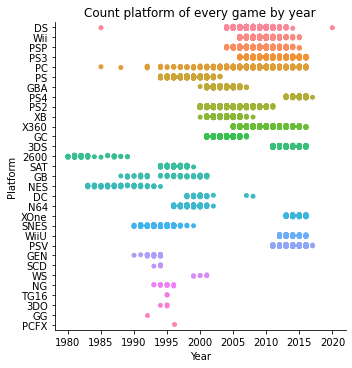

In [21]:
# Platform 트렌드

sns.catplot(x = 'Year', y = 'Platform', data=data3, )
plt.title("Count platform of every game by year")

Text(0.5, 1.0, 'Count Genre of every game by year')

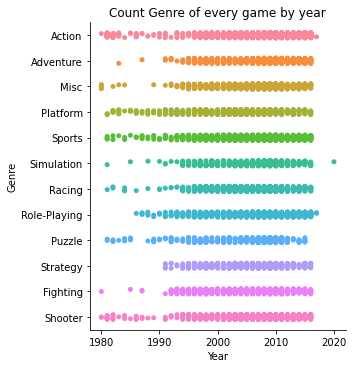

In [22]:
# Genre 트렌드
sns.catplot(x = 'Year', y = 'Genre', data=data3)
plt.title("Count Genre of every game by year")

### 전체 Sales 총합 생성

sales 총합의 연도에 따른 장르별, 플랫폼별 비교

In [23]:
# 장르와 연도에 따른 sales 총합 생성
data3['Total_Sales'] = data3['NA_Sales'] + data3['EU_Sales'] + \
                        data3['JP_Sales'] + data3['Other_Sales']
pg = data3.pivot_table(index='Year', columns='Genre', values='Total_Sales',
                      aggfunc='sum')
pg = pg.reset_index() #index 생성하여 year을 컬럼으로 오게 함
pg

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980.0,0.34,NaN,0.77,2.70,NaN,NaN,NaN,NaN,7.07,NaN,NaN,NaN
1,1981.0,14.79,NaN,NaN,NaN,6.92,2.25,0.48,NaN,10.02,0.44,0.78,NaN
2,1982.0,6.50,NaN,NaN,0.87,5.03,10.04,1.57,NaN,3.81,NaN,1.06,NaN
3,1983.0,2.86,0.40,NaN,2.14,6.93,0.78,NaN,NaN,0.49,NaN,3.20,NaN
4,1984.0,1.85,NaN,NaN,1.45,0.69,3.14,5.95,NaN,31.10,NaN,6.17,NaN
5,1985.0,3.52,NaN,1.05,NaN,43.17,3.21,NaN,NaN,1.00,0.04,1.96,NaN
6,1986.0,13.74,NaN,NaN,NaN,9.39,NaN,1.96,2.52,3.89,NaN,5.58,NaN
7,1987.0,1.11,4.38,5.42,NaN,1.74,NaN,NaN,4.65,0.69,NaN,3.71,NaN
8,1988.0,1.74,NaN,NaN,NaN,27.73,5.58,2.14,5.88,0.51,0.03,3.60,NaN
9,1989.0,4.65,NaN,NaN,1.28,20.66,37.75,NaN,2.20,1.19,NaN,5.72,NaN


In [24]:
pgm = pg.melt(id_vars=['Year']).sort_values('Year')
pgm

,Year,Genre,value
0,1980.0,Action,0.34
429,1980.0,Strategy,NaN
78,1980.0,Fighting,0.77
117,1980.0,Misc,2.70
390,1980.0,Sports,NaN
...,...,...,...
116,2020.0,Fighting,NaN
77,2020.0,Adventure,NaN
38,2020.0,Action,NaN
428,2020.0,Sports,NaN


### 연도에 따른 장르별 판매량 비교

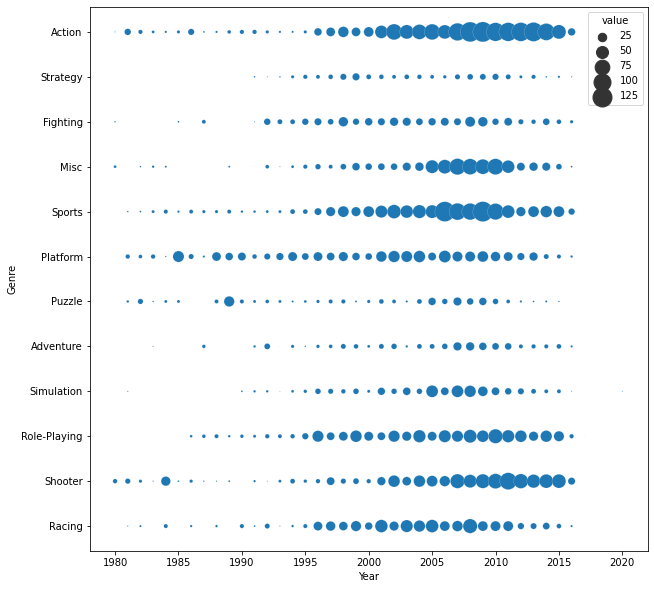

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=pgm,x='Year',y='Genre',size='value',
               sizes=(0,400))

### 연도에 따른 플랫폼별 판매량 비교

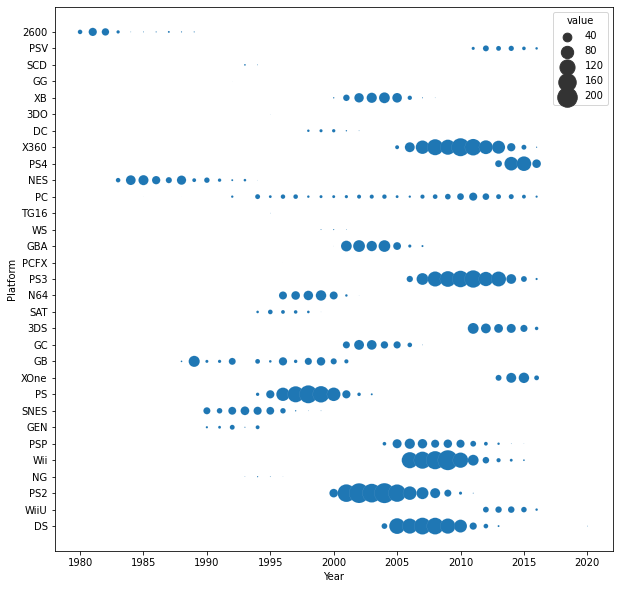

In [26]:
pgpl = data3.pivot_table(index='Year', columns='Platform', values='Total_Sales',
                      aggfunc='sum')
pgpl = pgpl.reset_index() #index 생성하여 year을 컬럼으로 오게 함

pgpl_m = pgpl.melt(id_vars=['Year']).sort_values('Year')


fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=pgpl_m,x='Year',y='Platform',size='value',
               sizes=(0,400))

### 연도별 각 지역의 Sales의 트렌드

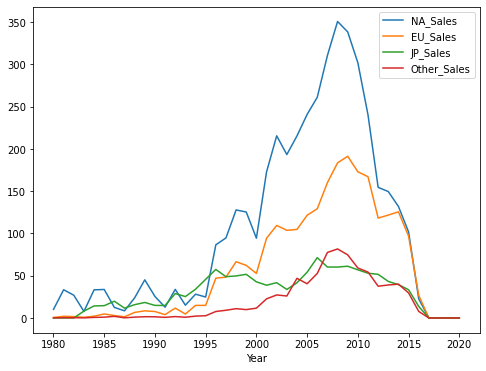

In [27]:
data_year = data3.groupby('Year').sum()

fig, ax = plt.subplots(figsize=(8,6))
data_year.plot(y=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],
              ax=ax)

#### Q2) 연도별 게임의 트렌드가 있을까?  
## A) 연도별로 Genre, Platform, 지역별 판매량 의 추세의 차이를 확인해 보았을때, Genre는 상대적으로 트렌드의 큰 변화는 없었으나 Game 을 플레이하는 Platform 이 시대가 지날수록 점점 새로운 게임기로 옮겨가는 것이 확연히 보여졌다. 
## 지역별 판매량은 모두 1995년부터 2009년 쯤 까지 모든 지역에서 증가하다가 감소하였다. 판매량 증감의 경향은 JP를 제외한 모든 지역이 비슷한 양상을 보였다.

================================

## Q3) 출고량이 높은 게임에 대한 분석 및 시각화

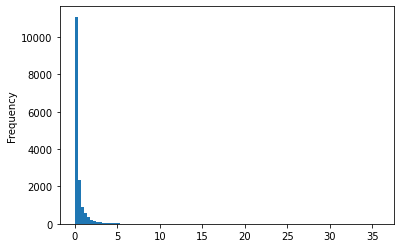

In [28]:
# 게임별 출고량 비교하기
data3[data3.Total_Sales<40].Total_Sales.plot.hist(bins=100)

In [29]:
# 출고량 x 값을 log 를 취한다
data3['Total_Sales_log'] = data3.Total_Sales.apply(lambda x:np.log(x) if x > 0 else 0)
data3.Total_Sales_log

1       -3.218876
2       -1.714798
3       -3.912023
4       -3.218876
5       -1.386294
           ...   
16594   -1.609438
16595   -4.605170
16596   -0.235722
16597   -0.967584
16598   -1.771957
Name: Total_Sales_log, Length: 16241, dtype: float64

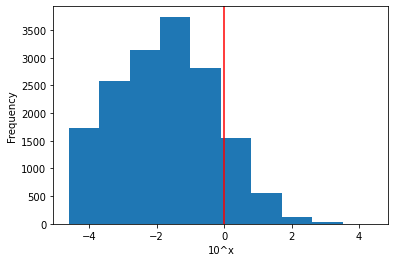

In [30]:

data3.Total_Sales_log.plot.hist()
plt.xlabel('10^x')
plt.axvline(0,color='r')

#### Total_Sales_log > 0, 즉 1M 이상의 판매고를 올린 것들을 높은 판매량의 게임이라 하자.

In [31]:
lot = data3[data3.Total_Sales>1]
lot

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Total_Sales_log
21,Ty the Tasmanian Tiger,PS2,2002.0,Platform,Electronic Arts,0.57,0.45,0.00,0.15,1.17,0.157004
25,Injustice: Gods Among Us,PS3,2013.0,Fighting,Warner Bros. Interactive Entertainment,0.48,0.53,0.01,0.23,1.25,0.223144
60,Bomberman,NES,1985.0,Puzzle,Hudson Soft,0.18,0.00,0.85,0.00,1.03,0.029559
67,Kirby: Mass Attack,DS,2011.0,Platform,Nintendo,0.52,0.06,0.41,0.05,1.04,0.039221
93,Disney Universe,Wii,2011.0,Action,Disney Interactive Studios,0.67,0.30,0.00,0.10,1.07,0.067659
...,...,...,...,...,...,...,...,...,...,...,...
16564,Wall-E,Wii,2008.0,Platform,THQ,0.51,0.40,0.00,0.11,1.02,0.019803
16574,Finding Nemo,PS2,2003.0,Action,THQ,1.26,0.60,0.05,0.18,2.09,0.737164
16576,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08,0.076961
16584,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009.0,Action,Activision,0.91,0.39,0.00,0.13,1.43,0.357674


분석 및 시각화 방법들

1) 년도
2) 지역별 판매량
3) 게임 회사
4) 플랫폼

판매량 적은 데이터와 비교해보자.


In [32]:
less = data3[data3.Total_Sales <= 1]
less

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Total_Sales_log
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04,-3.218876
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,-1.714798
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,-3.912023
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,-3.218876
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,-1.386294
...,...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,-1.609438
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,-4.605170
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,-0.235722
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,-0.967584


판매량 적은 / 많은 게임을 lot? 이름으로 라벨링

In [33]:
data3.loc[data3.Total_Sales>1,'lot?'] = 1
data3.loc[data3.Total_Sales<=1,'lot?'] = 0

data3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Total_Sales_log,lot?
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04,-3.218876,0.0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,-1.714798,0.0
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,-3.912023,0.0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,-3.218876,0.0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,-1.386294,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,-1.609438,0.0
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,-4.605170,0.0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,-0.235722,0.0
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,-0.967584,0.0


In [34]:
lot_pg = data3[data3['lot?'] == 1].pivot_table(index='Year', columns=['Genre'], values='Total_Sales',
                      aggfunc='sum')
lot_pg = lot_pg.reset_index() #index 생성하여 year을 컬럼으로 오게 함

lot_m = lot_pg.melt(id_vars=['Year']).sort_values('Year')
lot_m = lot_m.sort_values('Genre')
lot_m

,Year,Genre,value
0,1980.0,Action,NaN
2,1982.0,Action,NaN
3,1983.0,Action,NaN
20,2000.0,Action,23.55
19,1999.0,Action,16.96
...,...,...,...
417,1990.0,Strategy,NaN
416,1989.0,Strategy,NaN
415,1988.0,Strategy,NaN
438,2011.0,Strategy,4.18


### 판매량 > 1M 게임의 연도/장르별 판매량

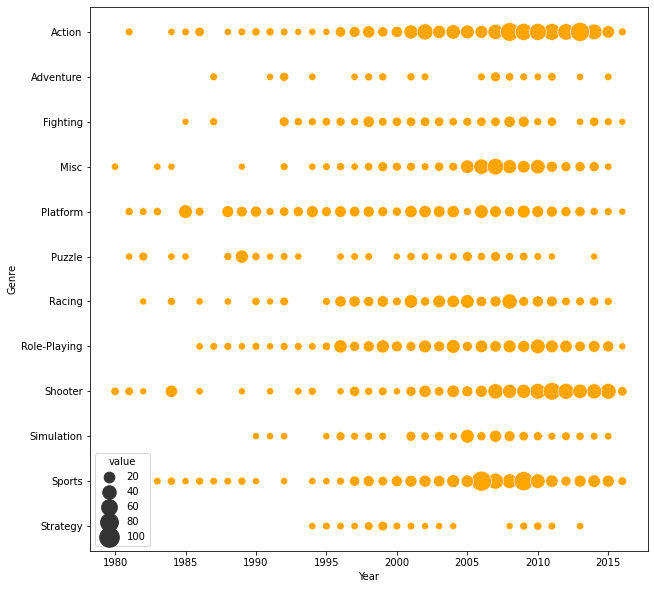

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=lot_m,x='Year',y='Genre',size='value',
               sizes=(50,400),ax=ax,alpha=1,c=['orange'])



### 판매량 <= 1M 게임의 연도/장르별 판매량

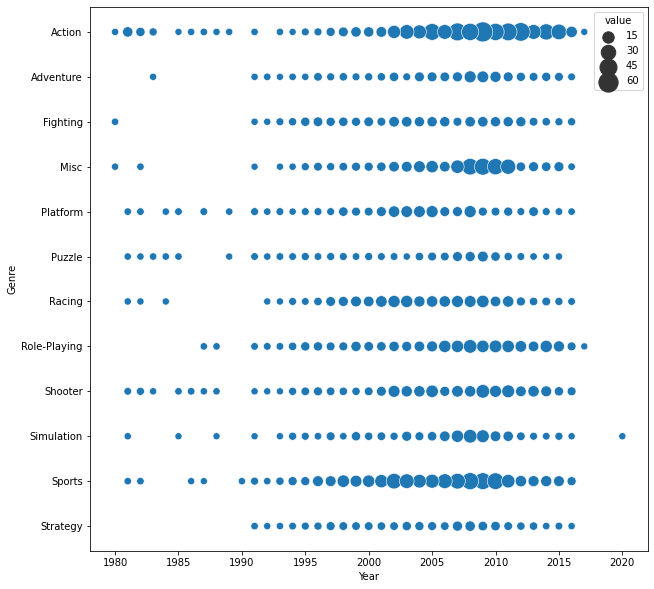

In [36]:
less_pg = data3[data3['lot?'] == 0].pivot_table(index='Year', columns=['Genre'], values='Total_Sales',
                      aggfunc='sum')
less_pg = less_pg.reset_index() #index 생성하여 year을 컬럼으로 오게 함

less_m = less_pg.melt(id_vars=['Year']).sort_values('Year')
less_m = less_m.sort_values('Genre')

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=less_m,x='Year',y='Genre',size='value',
               sizes=(50,400),ax=ax,alpha=1)

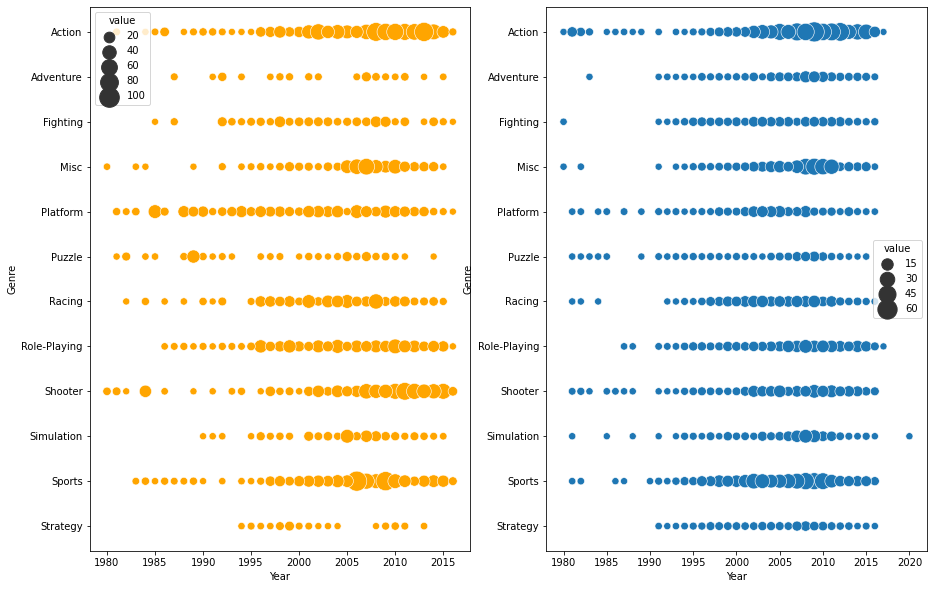

In [37]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
sns.scatterplot(data=lot_m,x='Year',y='Genre',size='value',
               sizes=(50,400),ax=ax[0],alpha=1,c=['orange'])

sns.scatterplot(data=less_m,x='Year',y='Genre',size='value',
               sizes=(50,400),ax=ax[1],alpha=1)

### 판매량 높은 / 낮은 데이터의 장르별 트렌드 차이가 확연하게 드러나진 않는다.
### 차이점 : 최근 들어서 Shooter 게임이 판매량이 많은 것을 알 수 있다.

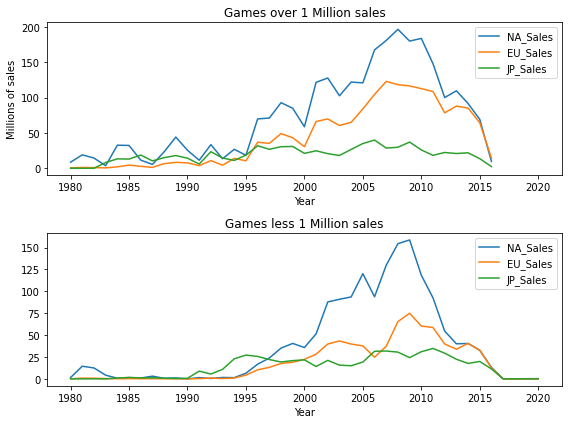

In [38]:
# 지역별 판매량
sales_lot = data3.loc[data3['lot?'] == 1,['Year','NA_Sales','EU_Sales','JP_Sales']].groupby('Year').sum()
sales_less = data3.loc[data3['lot?'] == 0,['Year','NA_Sales','EU_Sales','JP_Sales']].groupby('Year').sum()

fig, ax = plt.subplots(2,1,figsize=(8,6))
# lot_year = data3.groupby('Year').sum()
# lot_year = lot_year.sort_index('Year')
sales_lot.plot(y=['NA_Sales','EU_Sales','JP_Sales'],
              ax=ax[0])
sales_less.plot(y=['NA_Sales','EU_Sales','JP_Sales'],
              ax=ax[1])
ax[0].set_xlim(1978,2022)
ax[1].set_xlim(1978,2022)
ax[0].set_ylabel('Millions of sales')
ax[0].set_title('Games over 1 Million sales')
ax[1].set_title('Games less 1 Million sales')
plt.tight_layout()

### MultiIndex 를 이용한 FacetGrid Plot - 판매량 많은 / 적은 데이터를 나누어 연도/장르에 따른 판매량을 시각화

In [39]:
# sum of sales by year , but divided to lot/less
data_lotd = data3.loc[:,['Year','Genre','Total_Sales','lot?']].melt(id_vars=['Year','Genre','Total_Sales'])
data_lotd[data_lotd['value'] == 0].groupby('Year').sum()

data_lotd_div = pd.concat([data_lotd[data_lotd['value'] == 0].groupby(['Year','Genre']).sum(),
                         data_lotd[data_lotd['value'] == 1].groupby(['Year','Genre']).sum()])

#make value to 1
data_lotd_div.loc[data_lotd_div.value != 0,'value'] = 1
data_lotd_div

Total_Sales  value
Year   Genre                           
1980.0 Action               0.34    0.0
       Fighting             0.77    0.0
       Misc                 0.50    0.0
1981.0 Action              10.62    0.0
       Platform             0.96    0.0
...                          ...    ...
2016.0 Fighting             1.06    1.0
       Platform             1.18    1.0
       Role-Playing         1.56    1.0
       Shooter             12.92    1.0
       Sports               8.73    1.0

[678 rows x 2 columns]

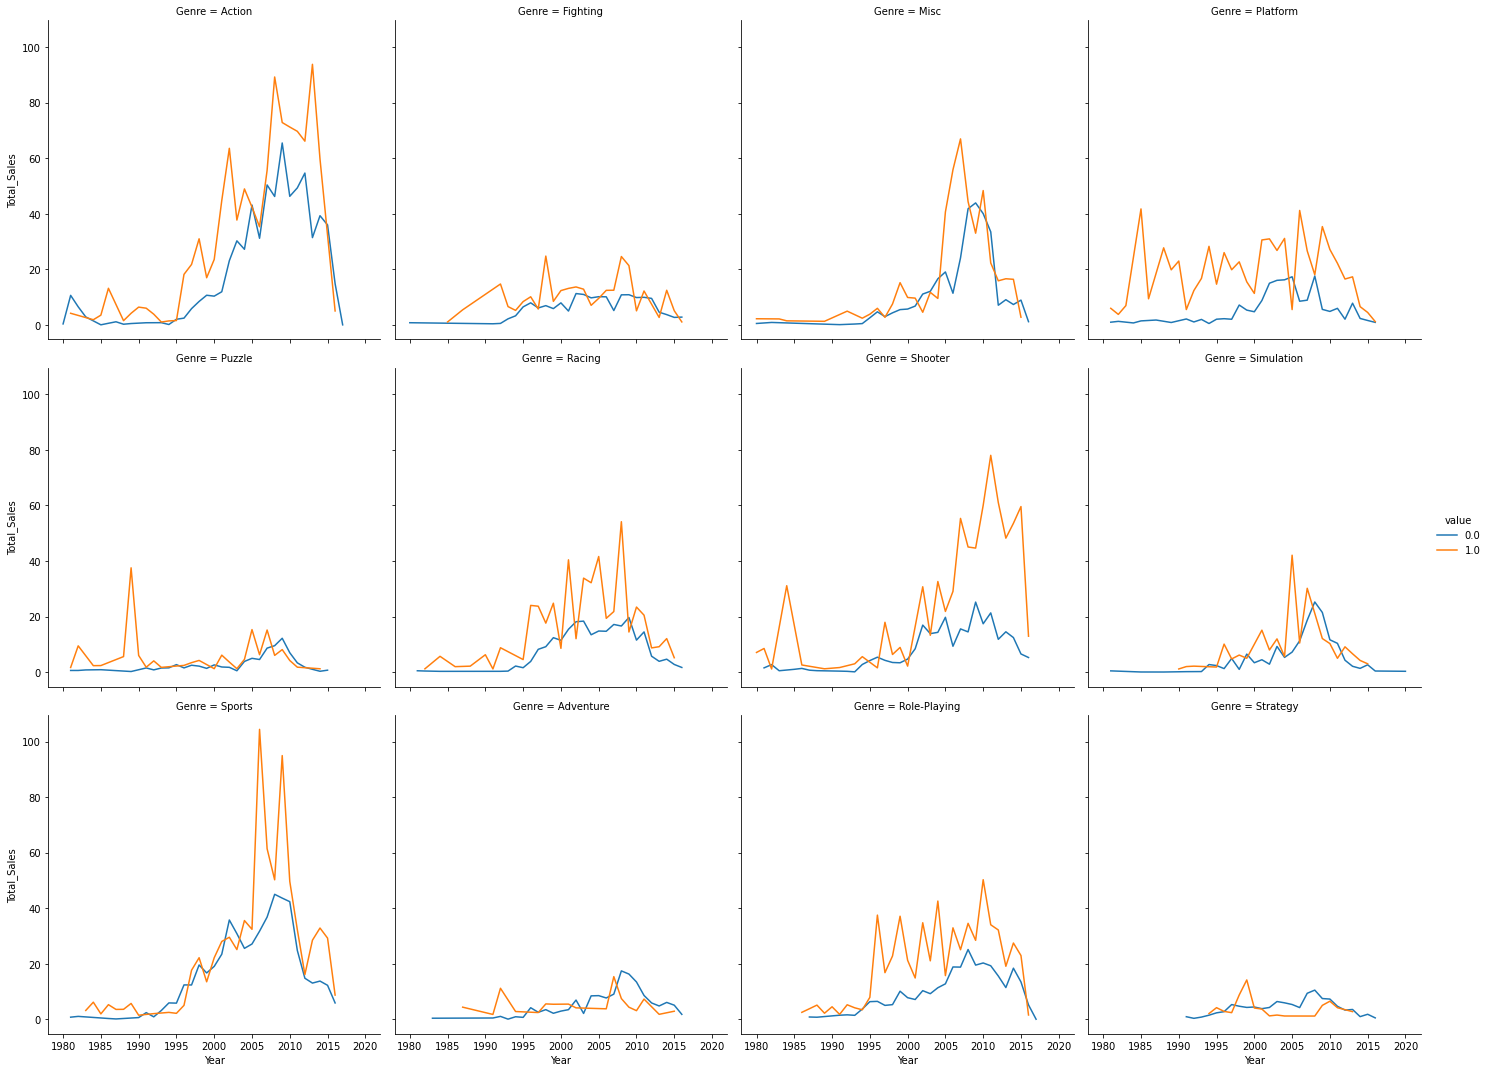

In [55]:
data_lotd_div = data_lotd_div.reset_index()
sns.relplot(data=data_lotd_div,x='Year',y='Total_Sales',kind='line',#)#
            col='Genre',col_wrap=4, hue='value')



#### Q3) 출고량이 높은 게임에 대한 분석 및 시각화
## A) 총합 1백만 장 이상의 판매고를 올린 게임들을 따로 그룹을 나누어서 지역별 판매량을 비교하여 보았고, 또한 장르별로 나누어 연도별 판매량의 특성을 살펴보았다.

## 출고량 높은 게임과 낮은 게임의 연도별 트렌드는 큰 차이가 없었다. 
## 출고량 높은 게임과 낮은 게임의 장르별 트렌드는 어느 정도 차이를 보인다. 

===========================================

### 프로젝트 주제 : 다음 분기에 어떤 게임을 설계해야 할까?
### 결론: Q1) Q2) Q3) 의 결과를 바탕으로, 

1) NA, EU, Other 지역은 전체 장르에서 비율의 차이가 크게 나지 않는다. 하지만 JP의 경우, 다른 세 지역과 비교하여 큰 차이를 보이는데 가장 두드러진 특징으로는 Action, Racing, Shooter, Sports의 선호도가 타 지역과 비교하여 떨어지고 다른 부분에서 선호도가 높은데 특히 Adventure, Puzzle, Strategy, Role-Playing 장르의 선호도가 압도적으로 높다는 점이다. 따라서 판매하고자 하는 지역에 따른 장르 선호도가 중요하다

2) PSP, PS3, PS4 등 최신 플랫폼 게임들이 선호된다. 하지만 PC 는 이전부터 지금까지 꾸준한 판매고를 유지하고 있으므로, 이러한 점을 고려하여 게임을 판매고가 높은 플랫폼에 맞추어 설계하는 것이 필요하다. 그리고 2015년 이후로 계속 판매량이 낮아지고 있어서 너무 큰 판매량은 기대하지 않는 것이 좋다.

3) 최근 판매고가 높은 게임의 장르는 Action , Shooter 게임이다. 따라서 이 두 가지의 장르 혹은 최근 판매고가 양호한 게임의 장르에 맞춰 개발하는 것이 좋을 것이다.


### 한계점: 발표 시간의 부족 및 데이터 분석 능력이 아직 부족하여 t-test, chi-square 및 기타 머신러닝 분석들을 적용해 보지 못하였다. 다음 기회에는 좀더 깊은 수준의 분석 방법을 적용하고 싶다.
#### 